In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
df2 = pd.read_csv('cars_cleaned.csv')

### Preliminary Ordinary Least Sqares Linear Regression with all variables considered

In [2]:
df1 = pd.read_csv('cars_cleaned.csv')
df1.head(5)

,Unnamed: 0,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Type,High-Performance,Performance
0,0,Acura,ILX Hybrid,2014,0,111.0,4,Luxury,AUTOMATIC,front wheel drive,"Luxury,Hybrid",Compact,Sedan,38,39,28900,Hybrid,0.0,0.0
1,1,Acura,ILX Hybrid,2014,0,111.0,4,Luxury,AUTOMATIC,front wheel drive,"Luxury,Hybrid",Compact,Sedan,38,39,34600,Hybrid,0.0,0.0
2,2,Acura,ILX,2016,0,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Luxury,Compact,Sedan,36,25,34890,Gas,0.0,0.0
3,3,Acura,ILX,2016,0,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Luxury,Compact,Sedan,36,25,29900,Gas,0.0,0.0
4,4,Acura,ILX,2016,0,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Luxury,Compact,Sedan,36,25,29200,Gas,0.0,0.0


In [3]:
make1= df1['Make']
model1 = df1['Model']
year1  = df1['Year']
eng_fuel1 = df1['Engine Fuel Type']
HP1 = df1['Engine HP']
cyl1 = df1['Engine Cylinders']
Trans1  = df1['Transmission Type']
Wheel_Dr1 = df1['Driven_Wheels']
Mkt_Cat1 = df1['Market Category']
size1 = df1['Vehicle Size']
style1 = df1['Vehicle Style']
mpg_highway1 = df1['highway MPG']
city_mpg1   = df1['city mpg']
MSRP1 = df1['MSRP']
class_1 = df1['Class']
type_1 = df1['Type']
high_perf1 = df1['High-Performance']
perf1 = df1['Performance']

In [4]:
model1 = smf.ols('MSRP1 ~ make1 + model1 + year1 + eng_fuel1 + HP1 + Trans1 + cyl1 + Wheel_Dr1 + Mkt_Cat1 + size1 + style1 + mpg_highway1 + class_1 + type_1 + high_perf1 + perf1',
               data=df1)

results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  MSRP1   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     892.8
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:33:13   Log-Likelihood:                -80312.
No. Observations:                7920   AIC:                         1.619e+05
Df Residuals:                    7299   BIC:                         1.662e+05
Df Model:                         620                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Observation:

With all the factors taken into account for the Multiple Linear Regression, the adjusted R-Squared value is at 0.986 which
is a high value, but does not necessarily reflect a good model as adjusted R-Square was more likely to be artifically inflated as number of variables increase. That comes mainly due to the Models of each car is treated as a dummy variable, which we could classify them by their Class, Vehicle Size, Vehicle Style and/or (Engine) Type. Also observed are duplicated values in 'Market Category', with each of 'Class' and 'Type', which are categorical variables. Hence, we should drop Market Category in favour of 'Class' and 'Type'.


### Observing Correlation Coefficients

In [5]:
df2.corr()       #Observed high corr between highway MPG and city MPG. dropped city mpg\

,Unnamed: 0,Year,Engine Fuel Type,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP,High-Performance,Performance
Unnamed: 0,1.000000,-0.051128,-0.084468,-0.224654,-0.220653,0.088454,0.112718,-0.127042,-0.198058,0.182874
Year,-0.051128,1.000000,-0.004322,0.033910,-0.079675,0.111331,0.080525,-0.075807,-0.015383,-0.075143
Engine Fuel Type,-0.084468,-0.004322,1.000000,-0.011050,-0.037655,0.345071,0.392019,-0.017011,-0.082692,-0.073595
Engine HP,-0.224654,0.033910,-0.011050,1.000000,0.841827,-0.503384,-0.427417,0.682275,0.614126,-0.007411
Engine Cylinders,-0.220653,-0.079675,-0.037655,0.841827,1.000000,-0.671162,-0.594037,0.635411,0.474636,-0.081292
highway MPG,0.088454,0.111331,0.345071,-0.503384,-0.671162,1.000000,0.947827,-0.266777,-0.198094,0.035333
city mpg,0.112718,0.080525,0.392019,-0.427417,-0.594037,0.947827,1.000000,-0.224099,-0.181776,0.000594
MSRP,-0.127042,-0.075807,-0.017011,0.682275,0.635411,-0.266777,-0.224099,1.000000,0.522016,-0.013354
High-Performance,-0.198058,-0.015383,-0.082692,0.614126,0.474636,-0.198094,-0.181776,0.522016,1.000000,-0.058242
Performance,0.182874,-0.075143,-0.073595,-0.007411,-0.081292,0.035333,0.000594,-0.013354,-0.058242,1.000000


We observed a high magnitude of correlation coefficient between Highway MPG and City MPG, which hold true to a huge extent as they
represent fuel efficiency, albeit under seperate driving conditions. Hence, we decided only to pick Highway MPG as 
the US has vast area, suggesting highways are very likely to be used by motorists, whereas City driving conditions 
may not be as applicable for more rural regions.

It is also noticeable that number of Engine Cylinders have a fairly high negative correlation coefficient with either of the MPG variables, which holds true in nature as more cylinders give more room for combustion of fuel, resulting in lower fuel efficiency which decreases MPG.

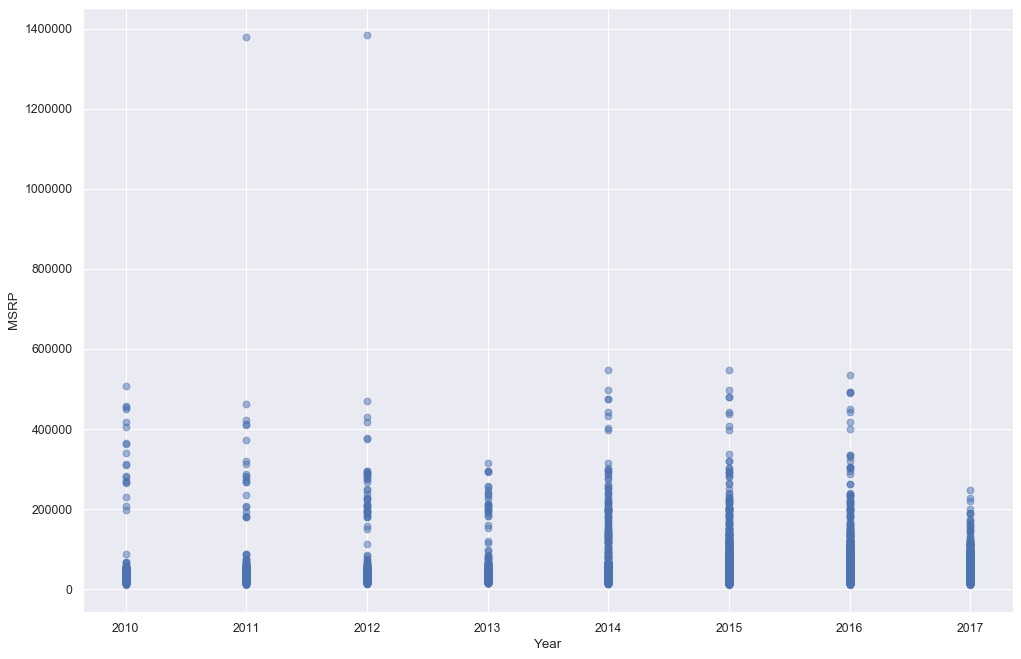

In [6]:
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(x=year1,        
            y=MSRP1,        
            c='b', alpha=0.5)  
plt.xlabel('Year')
plt.ylabel('MSRP')
plt.show()

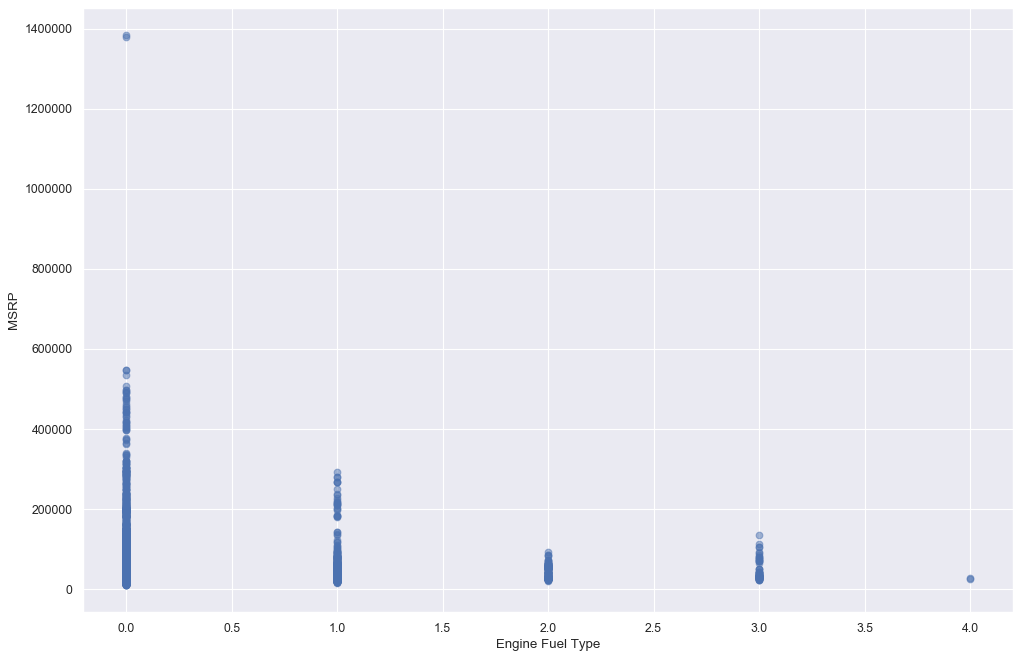

In [7]:
plt.figure(figsize=(15, 10), dpi=80)
plt.scatter(x=eng_fuel1,        
            y=MSRP1,        
            c='b', alpha=0.5)  
plt.xlabel('Engine Fuel Type')
plt.ylabel('MSRP')
plt.show()

We do not observe a clear relationship between Engine Fuel Type, Year compared to MSRP, which we hence decided to exclude from the model. City MPG and Highway MPG represents fuel efficiency of each individual vehicle as tested in respective driving conditions, city-driving and highway-driving. As both point to the idea of fuel efficiency of a vehicle, they have a high positive correlation coefficient as we expected, at 0.947827, therefore, we only chose to include one of them, which is highway driving. Consider the vast area of USA, we decided to pick highway MPG as we believed it was better representation, since USA also has many rural regions. Also, values in Market Category overlaps with Categorical Variables 'Class' and 'Type'. Hence we dropped these 4 variables from the model.

Later, we observed an approximate, close linear relationship between MSRP and Engine Horsepower raised to the power of 3, which is shown later.

In [8]:
#Drop following variables as scatterplots with MSRP does not suggest any observable relationship

df2.drop(columns=['Year','Engine Fuel Type', 'Market Category','city mpg'],inplace = True)
#HP is raised to the power of 3 as observed in scatterplot later, HP^3 has an observable linear relationship with MSRP
df2['HP^3'] = np.power(df2['Engine HP'], 3)  

In [9]:
df2.head(5)

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
0,0,Acura,ILX Hybrid,111.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,38,28900,Hybrid,0.0,0.0,1367631.0
1,1,Acura,ILX Hybrid,111.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,38,34600,Hybrid,0.0,0.0,1367631.0
2,2,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,34890,Gas,0.0,0.0,8120601.0
3,3,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29900,Gas,0.0,0.0,8120601.0
4,4,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29200,Gas,0.0,0.0,8120601.0


In [10]:
make= df2['Make']
model = df2['Model']
HP_cube = df2['HP^3']
cyl = df2['Engine Cylinders']
Trans  = df2['Transmission Type']
Wheel_Dr = df2['Driven_Wheels']
size = df2['Vehicle Size']
style = df2['Vehicle Style']
mpg_highway = df2['highway MPG']
MSRP = df2['MSRP']
class_ = df2['Class']
type_ = df2['Type']
high_perf = df2['High-Performance']
perf = df2['Performance']

# Data Visualisation between Variables

### 1. Comparing Transmission Type of Cars and MSRP

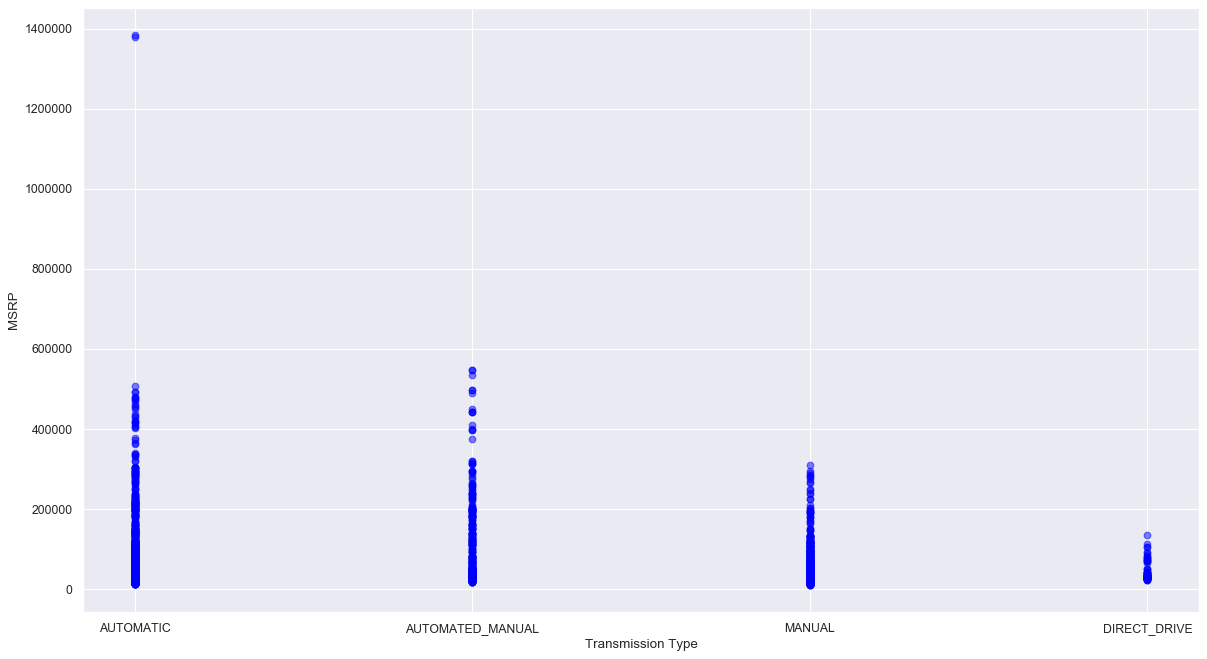

In [11]:
plt.figure(figsize=(18, 10), dpi=80)
plt.scatter(x=Trans,        
            y=MSRP,        
            c='blue', alpha=0.5)  
plt.xlabel('Transmission Type')
plt.ylabel('MSRP')
plt.show()

From the above graph, we can see a general decreasing trend as we move from automatic to direct drive cars. This shows that automatic cars and automated manual cars are approximately around the same price and they are generally more expensive than manual cars, which are more expensive than direct drive cars. We also observe an outlier among the automatic category, with one MSRP at 1380000.

### 2. Comparing Make of Cars and MSRP 

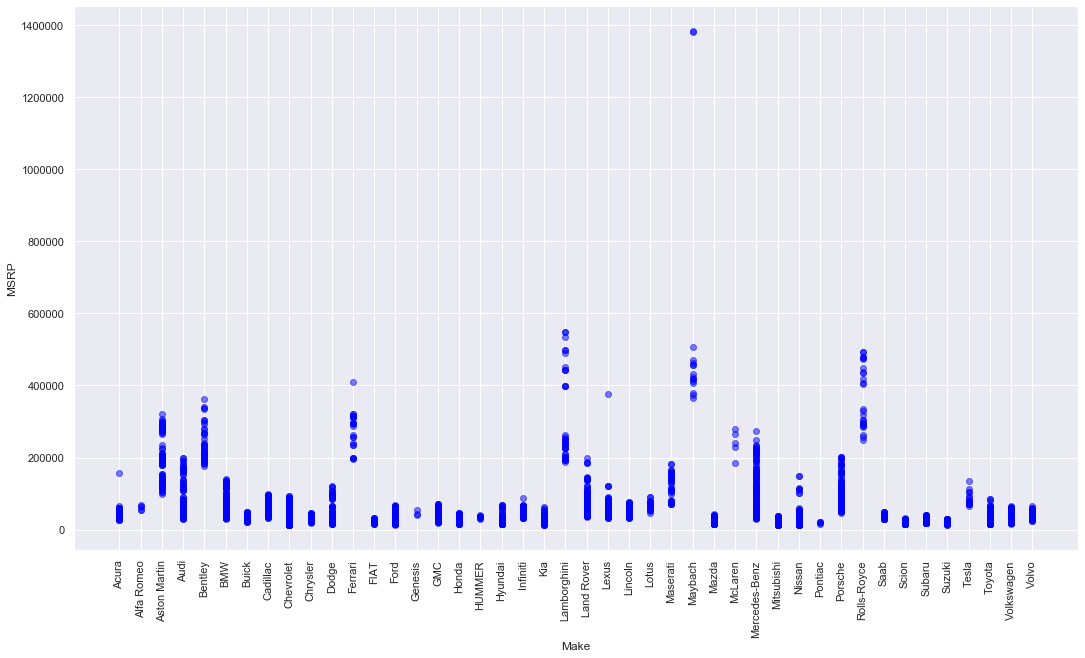

In [12]:
plt.figure(figsize=(18, 10))
plt.scatter(make, MSRP,
            c='blue', alpha=0.5)
plt.xlabel('Make')
plt.ylabel('MSRP')
plt.xticks(rotation=90)
plt.show()

            Make         
MSRP  mean  Acura             43118.333333
            Alfa Romeo        61600.000000
            Aston Martin     197834.647059
            Audi              61795.000000
            BMW               63325.704918
            Bentley          233853.518519
            Buick             33664.916667
            Cadillac          58279.955621
            Chevrolet         36200.372578
            Chrysler          33048.148148
            Dodge             35386.523438
            FIAT              22670.241935
            Ferrari          276510.521739
            Ford              34964.354478
            GMC               40043.561644
            Genesis           46616.666667
            HUMMER            36117.777778
            Honda             28022.397436
            Hyundai           26730.140000
            Infiniti          46876.483051
            Kia               27639.537572
            Lamborghini      298204.761905
            Land Rover      

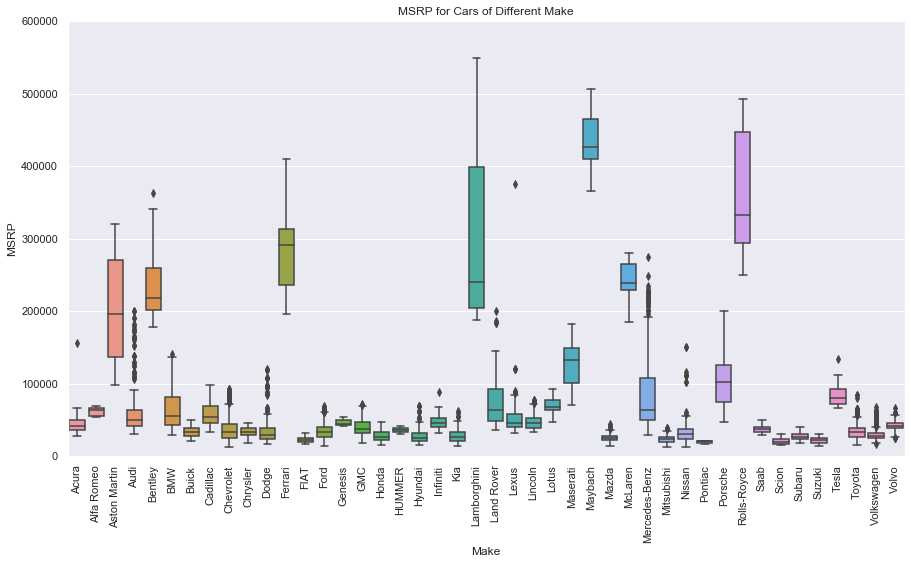

In [13]:
plt.figure(figsize=(15,8))
plt.ylim(0,600000)
avg_pri_diff_type = df2.groupby(['Make'])[['MSRP']].agg([np.mean]).unstack()
sns.boxplot(x= "Make", y="MSRP", data = df2)
plt.title("MSRP for Cars of Different Make")
plt.xticks(rotation=90)
avg_pri_diff_type

From the diagram above, we can see that branded cars, such as Ferrari, Lamborghini, Bentley and Rolls-Royce, have significantly higher prices than other cars. The variation in prices for the branded cars are also much larger than that of the more average cars, such as Subaru, Suzuki, Toyota, Kia and Honda.

### 3. Comparing Horsepower and MSRP

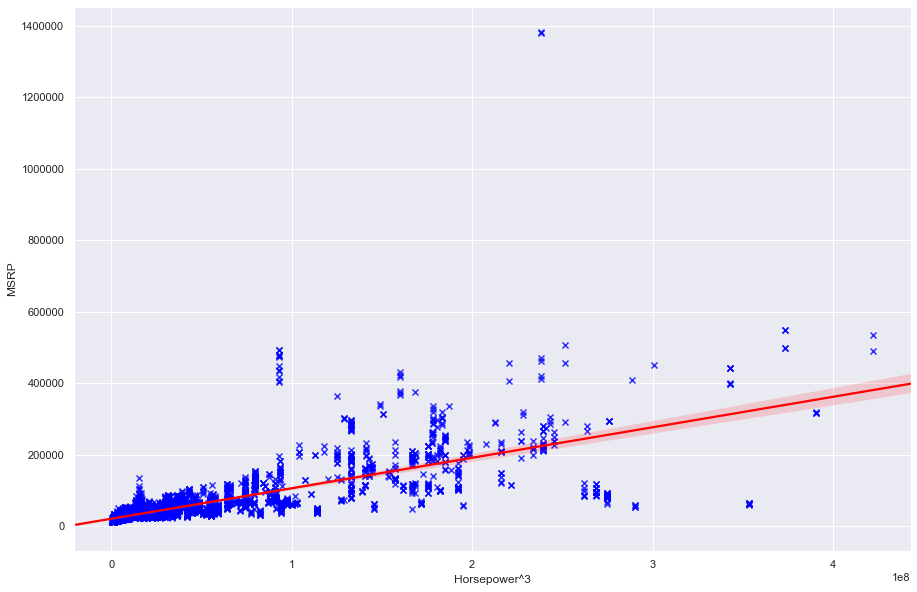

In [14]:
#x is in scientific notation, i.e. n * 10^8, where  0 <= n <= 4
plt.figure(figsize=(15, 10))
sns.regplot(HP_cube,MSRP, marker = "x", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Horsepower^3')
plt.ylabel('MSRP')
plt.show()

From the diagram, we observe a very close linear relationship between Engine Horsepower raised to the power of 3 
and MSRP, with the exception of an outlier whose MSRP = $1380000, identified as Maybach Landaulet which is a limited
edition vehicle. Generally, we observe a relationship where the greater the horsepower of a car, the greater its MSRP,
with the exception of Maybach Landaulet, an ultra-luxurious vehicle built not for the purpose of having the best Horsepower
for its price. Generally, the positive relationship between can be seen between Engine Horsepower and MSRP to hold true to a huge extent.

### 4. Comparing Engine Cylinders and MSRP

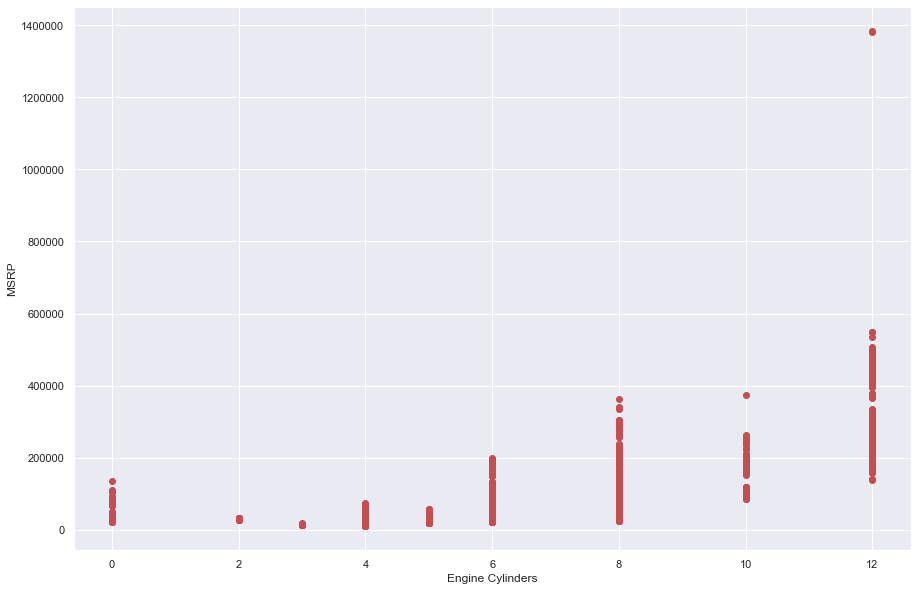

In [15]:
#cylinders relationship with MSRP
#0 cylinders = electric cars

plt.figure(figsize=(15, 10))
bx = plt.scatter(cyl, MSRP,
            c='r')
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.show()

We can see a generally positive relationship between Engine Cyclinders and MSRP of vehicles, which by intuition is true
as more expensive vehicles usually have a greater displacement capacity (not included in the dataset) and engine cylinders 
to support the performance of the vehicle in higher horsepower, and smoothness of the engine.

With the exception of 0 engine cylinders, which all point to Electric Vehicles which do not run on combustion engine, but
electric motors. Hence, we can generally conclude if number of engine cylinders n increases, where n is not equal to 0, a
positive relationship is observed between number of engine cylinders of a car and its MSRP

In [16]:
df2[(df2['Engine Cylinders'] == 8) & (df2['MSRP'] <= 30000)]

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
1991,1991,Chevrolet,Colorado,300.0,8,Normal,AUTOMATIC,rear wheel drive,Compact,Crew Cab Pickup,20,28340,Gas,0.0,0.0,27000000.0
1992,1992,Chevrolet,Colorado,300.0,8,Normal,AUTOMATIC,rear wheel drive,Compact,Extended Cab Pickup,20,27010,Gas,0.0,0.0,27000000.0
2330,2330,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,rear wheel drive,Large,Regular Cab Pickup,19,25155,Gas,0.0,0.0,29791000.0
2331,2331,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,rear wheel drive,Large,Regular Cab Pickup,19,24855,Gas,0.0,0.0,29791000.0
2332,2332,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,rear wheel drive,Large,Crew Cab Pickup,19,28865,Gas,0.0,0.0,29791000.0
2333,2333,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,rear wheel drive,Large,Crew Cab Pickup,19,28510,Gas,0.0,0.0,29791000.0
2352,2352,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,four wheel drive,Large,Regular Cab Pickup,18,25065,Gas,0.0,0.0,29791000.0
2353,2353,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,four wheel drive,Large,Regular Cab Pickup,18,28725,Gas,0.0,0.0,29791000.0
2354,2354,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,four wheel drive,Large,Regular Cab Pickup,18,25365,Gas,0.0,0.0,29791000.0
2355,2355,Dodge,Ram Pickup 1500,310.0,8,Premium,AUTOMATIC,four wheel drive,Large,Regular Cab Pickup,18,28425,Gas,0.0,0.0,29791000.0


We were surprised to see some 8 cylinder engines in the 20000 to 30000 USD range from the graph. The data does show that these belong to commercial vehicle categories, which are heavier in weight and larger in size in general, which may require more torque to carry the heavier weights of these vehicles.

### 4.1 Justification between Engine Cylinders and Engine Horsepower

We first retrieve the high correlation coefficient figure between Engine Cylinder and Horsepower.

In [17]:
df2[['Engine HP','Engine Cylinders']].corr()

,Engine HP,Engine Cylinders
Engine HP,1.000000,0.841827
Engine Cylinders,0.841827,1.000000


We discovered a strong correlation of 0.841  between Engine Horsepower and Engine Cylinders, which is true as increased number of cylinders contribute to greater displacement and the ability to burn more fuel during each revolution of of the engine, resulting in greater output in power.

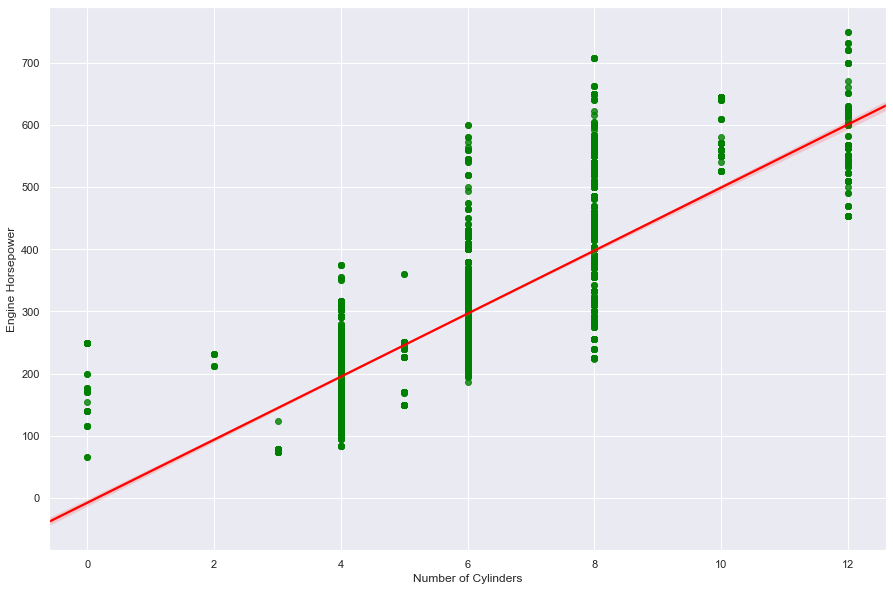

In [18]:
plt.figure(figsize=(15, 10))
sns.regplot(cyl,HP1, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.ylabel('Engine Horsepower')
plt.xlabel('Number of Cylinders')
plt.show()

Generally, we do observe greater horsepower from greater number of cylinders, but more appropriately, the physical limit of how much horsepower can be generated from the number of cylinders in the engine. We chose not to exclude either number of cylinders or engine power despite the high positive correlation coefficient as we do see the residual values, difference between actual Horsepower value and fitted Horsepower value can get quite big, depending on tuning by the manufacturer. And it should be noted that more engine cylinders does improve the smoothness of the engine when it runs, so we think it should be appropriate for customers to specify how many engine cylinders they want in their car purchase.

### 5. Comparing Classes and MSRP - Overlaps in prices between different types of class

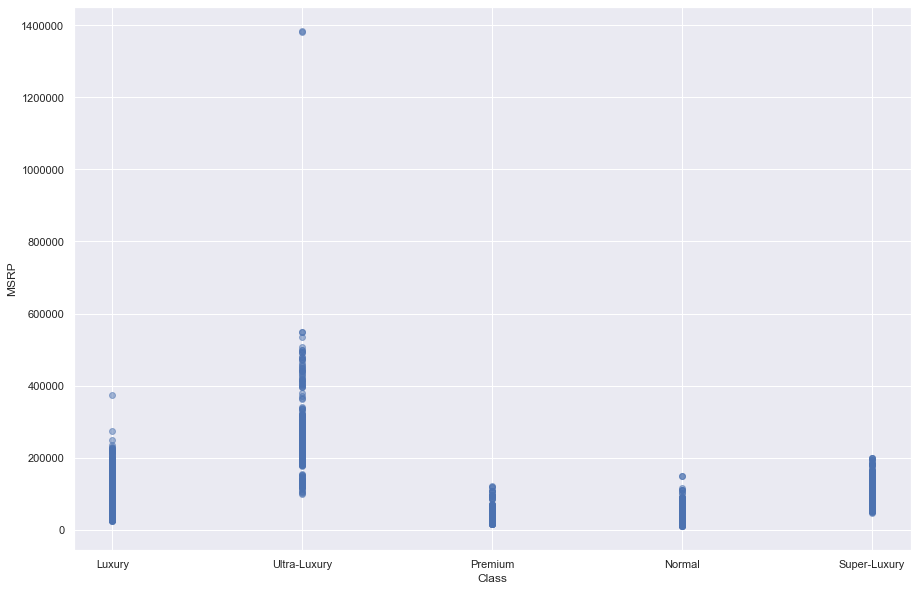

In [19]:
plt.figure(figsize=(15, 10))
plt.scatter(class_, MSRP,
            c='b', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('MSRP')
plt.show()

This scatterplot suggests there are overlaps between classes of cars in their MSRP. For example, for the same amount of money, a customer could have choices between Luxury, Premium or Normal Brands (Make), which generally apply to every class. Here, we also see manufacturers (Make) despite being classfied into a certain category in Class, they have product offerings that is below or even above their market segment.

In [20]:
df2[(df2['Class'] == 'Ultra-Luxury') & (df2['MSRP'] <= 100000)]

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
224,224,Aston Martin,V8 Vantage,430.0,8,Ultra-Luxury,MANUAL,rear wheel drive,Compact,Coupe,19,98200,Gas,1.0,0.0,79507000.0


We observe there is one offering from the Ultra-Luxury segment which intersects with the pricing range of the Super-Luxury Segment.

In [21]:
print(str(len(df2[(df2['Class'] == 'Luxury') & (df2['MSRP'] <= 30000)])), 'Luxury Cars have pricing levels at the Premium segment')
df2[(df2['Class'] == 'Luxury') & (df2['MSRP'] <= 30000)]

27 Luxury Cars have pricing levels at the Premium segment


,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
0,0,Acura,ILX Hybrid,111.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,38,28900,Hybrid,0.0,0.0,1367631.0
3,3,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29900,Gas,0.0,0.0,8120601.0
4,4,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29200,Gas,0.0,0.0,8120601.0
7,7,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,27900,Gas,0.0,0.0,8120601.0
9,9,Acura,ILX,150.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,35,29350,Gas,0.0,0.0,3375000.0
10,10,Acura,ILX,150.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,35,27050,Gas,0.0,0.0,3375000.0
16,16,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,35,29290,Gas,0.0,0.0,8120601.0
19,19,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,35,27990,Gas,0.0,0.0,8120601.0
20,20,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,35,29990,Gas,0.0,0.0,8120601.0
43,43,Acura,ILX,201.0,4,Luxury,MANUAL,front wheel drive,Compact,Sedan,31,29350,Gas,0.0,0.0,8120601.0


In [22]:
df2[((df2['Class'] == 'Premium') | (df2['Class'] == 'Normal')) &  (df2['MSRP'] <= 30000) & (df2['MSRP'] >= 25000)]

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
897,897,Buick,Encore,153.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,34,27350,Gas,0.0,0.0,3581577.0
898,898,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,34,25565,Gas,0.0,0.0,2628072.0
899,899,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,29435,Gas,0.0,0.0,2628072.0
900,900,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,27950,Gas,0.0,0.0,2628072.0
902,902,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,26155,Gas,0.0,0.0,2628072.0
903,903,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,28300,Gas,0.0,0.0,2628072.0
904,904,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,29785,Gas,0.0,0.0,2628072.0
906,906,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,26355,Gas,0.0,0.0,2628072.0
907,907,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,26865,Gas,0.0,0.0,2628072.0
910,910,Buick,Encore,138.0,4,Premium,AUTOMATIC,front wheel drive,Compact,4dr SUV,33,29065,Gas,0.0,0.0,2628072.0


There are 1203 cars which are either Premium or Normal class if priced between 25000 and 30000, as a benchmark for price
range of Premium cars which are defined to be lower than Luxury cars but higher then Normal cars.

These info are useful for us in allowing us to express to our clients that use price alone to choose a suitable for them would not be feasible as there are options that vary in size and class, so we would need them to specify more requirements to attempt to find a fitting car from our database.

### 6. Comparing MSRP for Cars of Different Class and Size

MSRP                                             \
                      mean                                              
Class               Normal       Premium        Luxury   Super-Luxury   
Vehicle Size                                                            
Compact       26087.422212  36016.000000  59199.459135  109075.000000   
Midsize       31250.041581  30986.301887  49710.393816  100748.000000   
Large         40818.326484  41499.969970  78309.261168  124196.533333   

                             
                             
Class          Ultra-Luxury  
Vehicle Size                 
Compact       190607.863636  
Midsize       278674.010870  
Large         357855.366197

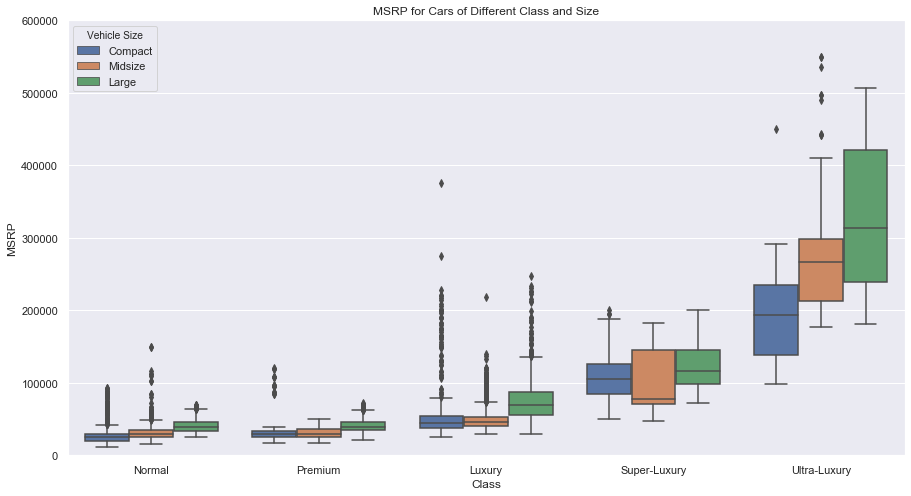

In [23]:
Class_1 = ['Normal', 'Premium', 'Luxury', 'Super-Luxury','Ultra-Luxury']
category_class = pd.api.types.CategoricalDtype(categories=Class_1, ordered=True)
df2['Class'] = df2['Class'].astype(category_class)

Vehicle_size = ['Compact', 'Midsize', 'Large']
category_size = pd.api.types.CategoricalDtype(categories=Vehicle_size, ordered=True)
df2['Vehicle Size'] = df2['Vehicle Size'].astype(category_size)

plt.figure(figsize=(15,8))
plt.ylim(0,600000)
avg_pri_diff_type = df2.groupby(['Vehicle Size','Class'])[['MSRP']].agg([np.mean]).unstack()
sns.boxplot(x= "Class", y="MSRP", hue = "Vehicle Size", data = df2, order=['Normal', 'Premium', 'Luxury', 'Super-Luxury','Ultra-Luxury'])
plt.title("MSRP for Cars of Different Class and Size")
avg_pri_diff_type

# variance big for super-luxury, ultra-luxury
# general increasing trend

We make 2 observations from this box-and-whiskers diagram. 

Due to scale of the diagram, we do see vehicles in Normal, Premium and Luxury classes, regardless of their size, have a small variance in their price, which is generally true as consumers the gap between these MSRPs in these cars are much smaller compared to the Super Luxury segment and the Ultra-Luxury segment, which differs in thousands of dollars rather than tens of thousands and even hundred thousand of dollars.

We also see a much higher price variance in super-luxury and ultra-luxury class. As class go higher, class is no longer the only differentiating factor that contributes to price. The number of units in production of cars also play a factor. Ultra-Luxury brands offer limited editions of their cars that are oversubscribed in demand and only has very limited number of units, and hence are priced much higher than their regular mass produced offerings which are at the lower quantiles of the price range in the Ultra-Luxury class. For example, the outlier Maybach Landaulet priced at close to 14 million, has only 1 unit in existence. And at the ultra-luxury class, lower price is no longer a consideration for potential buyers, who are not very price sensitive. In fact, they might be better attracted to the fact of a high price whcih reflects their status symbol. 

### 7. Comparing Class, Vehicle Style and MSRP

MSRP                                            \
                       mean                                             
Vehicle Style 2dr Hatchback       2dr SUV 4dr Hatchback       4dr SUV   
Class                                                                   
Normal         23809.200803           NaN  23007.679577  33803.742063   
Premium                 NaN           NaN           NaN  38790.326531   
Luxury         26258.333333  49791.666667  50585.000000  58916.965418   
Super-Luxury            NaN           NaN           NaN  82091.666667   
Ultra-Luxury            NaN           NaN           NaN           NaN   

                                                                          \
                                                                           
Vehicle Style Cargo Minivan     Cargo Van    Convertible Convertible SUV   
Class                                                                      
Normal         23306.111111  29927.750000   38343.769231    43691.666667   
Premium                 NaN  31863.214286   33136.875000             NaN   
Luxury         28950.000000           NaN   72544.368132    54400.000000   
Super-Luxury            NaN           NaN  123648.558140             NaN   
Ultra-Luxury            NaN           NaN  277286.494253             NaN   

                                                                  \
                                                                   
Vehicle Style          Coupe Crew Cab Pickup Extended Cab Pickup   
Class                                                              
Normal          38505.662651    38470.653938        31708.973485   
Premium         60795.980392    38780.225225        31666.279070   
Luxury          71778.750000    66572.222222                 NaN   
Super-Luxury   112592.769231             NaN                 NaN   
Ultra-Luxury   243317.339286             NaN                 NaN   

                                                                  \
                                                                   
Vehicle Style Passenger Minivan Passenger Van Regular Cab Pickup   
Class                                                              
Normal             33669.833333  36200.542169       30777.102273   
Premium            31705.789474  34804.117647       29932.777778   
Luxury             32500.000000           NaN                NaN   
Super-Luxury                NaN           NaN                NaN   
Ultra-Luxury                NaN           NaN                NaN   

                                            
                                            
Vehicle Style          Sedan         Wagon  
Class                                       
Normal          26149.024565  26428.475936  
Premium         31570.730337  18711.764706  
Luxury          55111.527313  44002.007874  
Super-Luxury   113193.023256           NaN  
Ultra-Luxury   316226.250000           NaN

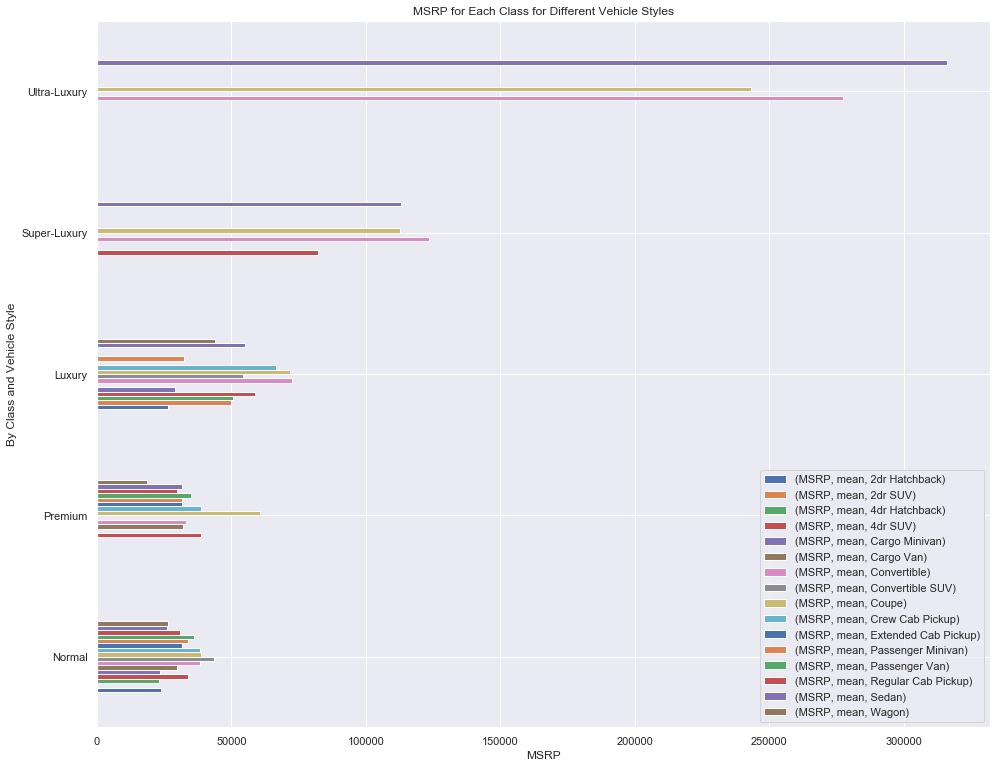

In [24]:
Class_1 = ['Normal', 'Premium', 'Luxury', 'Super-Luxury','Ultra-Luxury']
category_class = pd.api.types.CategoricalDtype(categories=Class_1, ordered=True)
df2['Class'] = df2['Class'].astype(category_class)

df_rev = df2.groupby(['Class','Vehicle Style'])[['MSRP']].agg([np.mean]).unstack() #finding on avg, which type avocado earns the most in which region during which season
ax = df_rev.plot(kind='barh', title="MSRP for Each Class for Different Vehicle Styles", figsize = (16,13))
ax.legend(loc='best')
ax.set_xlabel("MSRP")
ax.set_ylabel("By Class and Vehicle Style")
df_rev
# ultra-luxury & super-luxury --> price ofc highest
# premium, normal & luxury --> customers can choose either of them for a same price 

Other than the general increasing mean MSRP trend from Normal, Premium, Luxury, Super Luxury and Ultra-Luxury classes that is visible, we try to look a little deeper at respective categories

The super luxury and ultra luxury class have 3 common types of vehicles: Coupe, Convertible, and Sedan. In these 2 classes, mean MSRP of coupe is less than convertible.

In the Premium and Luxury Class, Coupes' mean MSRP is also higher than most if not all other types in the same class. Sedans also have lower mean MSRP compared to Coupes and Convertibles in the same class, for classes which are Normal, Premium, Luxury and Super-Luxury.


### Run OLS

In [25]:
model = smf.ols('MSRP ~ make + HP_cube + Trans + cyl + Wheel_Dr + size + style + mpg_highway + class_ + type_ + high_perf + perf',                                      # Specify the model
               data=df2)                                         # Specify the datasets

results = model.fit()                                             # Fit the model
print(results.summary())                                          # Show the report of results

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     609.1
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:33:19   Log-Likelihood:                -89901.
No. Observations:                7920   AIC:                         1.800e+05
Df Residuals:                    7844   BIC:                         1.805e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

The adjusted R-squared value, the coefficient of determination at 0.852 tells us that after adjustment for number of variables in the model, 85.2% of variation in MSRP (the predicted variable), or the Sum of Total Squares, SST is being explained by the independent predictor variables.

The Probability of F-statistic at 0.00 tells us there is practically zero likelihood that none of the predictor variables have an effect on the predicted variable, the MSRP.

We observe that the following variables: are statisfically insignificant at a 5% significance level, since their individual
p-values are greater than 0.05:
[Buick, Chrysler, Fiat, Ford, GMC, Genesis, Hummer, Honda, Hyundai, Kia, Lincoln, Mazda, Mitsubishi, Nissan, Pontiac, 
Saab, Scion, Subaru, Suzuki, Volkswagen, Volvo] under Make,

[Direct-Drive] under Transmission Type

[Four-Wheel Drive, Front Weheel Drive] under Wheel Drive Type

[2-Door SUV, 4-Door Hatchback, 4-Door SUV, Cargo Minivan, Convertible SUV, Coupe, Passenger Minivan, Passenger Van,
Sedan, Wagon] under Style,

[Electric, Hybrid, PHEV] under Engine Type

[MPG Highway, High Performance, Performance] 

which means we do not reject each null hypothesis that their each of these variables' coefficients = 0, meaning we do not have enough statisfically evidence to prove they have an effect on MSRP of a car.

However, the Engine Horsepower when raised to the power of 3, number of Engine cylinders and Class have a p-value so small they are statistically significant, which means we reject the null hypothesis where each of their coefficients is 0, meaning they are mostly likely influencers on the MSRP, which is our predicted variable. And we do observe large magnitudes in coefficients of number of cylinders, each of the Class dummy variables (Normal, Premium, Luxury, Super-Luxury and Ultra-Luxury) which show how much they affect MSRP, ceteris paribus. 

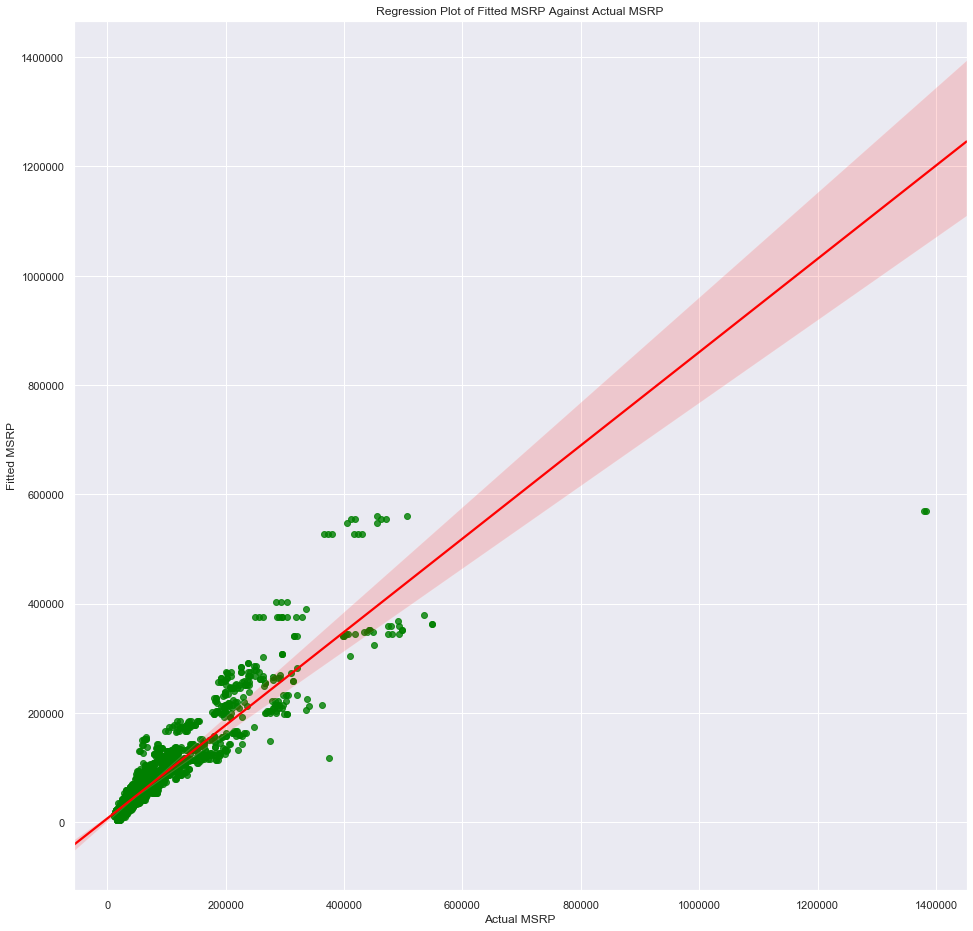

In [26]:
plt.figure(figsize = (16,16))
y_hat = results.fittedvalues 
y_act = df2['MSRP']
sns.regplot(x=y_act,y=y_hat,data=df2, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel('Actual MSRP')
plt.ylabel('Fitted MSRP')
plt.title('Regression Plot of Fitted MSRP Against Actual MSRP')
plt.show()

In [27]:
df2[(df2['MSRP'] >= 350000) &  (df2['MSRP'] <= 400000)]

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3
588,588,Bentley,Azure T,500.0,8,Ultra-Luxury,AUTOMATIC,rear wheel drive,Large,Convertible,15,363000,Gas,1.0,0.0,125000000.0
4364,4364,Lamborghini,Aventador,700.0,12,Ultra-Luxury,AUTOMATED_MANUAL,all wheel drive,Midsize,Coupe,18,397500,Gas,1.0,0.0,343000000.0
4366,4366,Lamborghini,Aventador,700.0,12,Ultra-Luxury,AUTOMATED_MANUAL,all wheel drive,Midsize,Coupe,18,397500,Gas,1.0,0.0,343000000.0
4370,4370,Lamborghini,Aventador,700.0,12,Ultra-Luxury,AUTOMATED_MANUAL,all wheel drive,Midsize,Coupe,18,399500,Gas,1.0,0.0,343000000.0
4631,4631,Lexus,LFA,552.0,10,Luxury,AUTOMATED_MANUAL,rear wheel drive,Compact,Coupe,16,375000,Gas,1.0,0.0,168196608.0
4807,4807,Maybach,57,543.0,12,Ultra-Luxury,AUTOMATIC,rear wheel drive,Large,Sedan,16,366000,Gas,0.0,0.0,160103007.0
4813,4813,Maybach,57,543.0,12,Ultra-Luxury,AUTOMATIC,rear wheel drive,Large,Sedan,16,372500,Gas,0.0,0.0,160103007.0
4818,4818,Maybach,57,543.0,12,Ultra-Luxury,AUTOMATIC,rear wheel drive,Large,Sedan,16,379050,Gas,0.0,0.0,160103007.0


When we plot the fitted MSRP based on our second OLS Multiple Linear Regression Model against Actual MSRP, we do note most of the points are scattered very closely to the fitted line for actual MSRP less than 300,000 USD. As MSRP increase beyond that point, we do observe a greater distance between the fitted line which indicates fitted MSRP and actual MSRP of the car, suggesting our model might be more suitable and more accurate in predicting prices below 300,000 USD, so customers looking for cars beyond that price might not get a very close recommendation of a particular car model for their given budget.

### Generate Residuals

In [28]:
df3 = df2.copy()
df3['yhat'] = results.fittedvalues        #Predicted Values, Y-hat

### Scatterplot of standardised residuals against fitted values to check non-constant variance

In [29]:
df3['Residuals'] = df3['MSRP'] - df3['yhat']
df3.head(5)

,Unnamed: 0,Make,Model,Engine HP,Engine Cylinders,Class,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,MSRP,Type,High-Performance,Performance,HP^3,yhat,Residuals
0,0,Acura,ILX Hybrid,111.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,38,28900,Hybrid,0.0,0.0,1367631.0,34634.016679,-5734.016679
1,1,Acura,ILX Hybrid,111.0,4,Luxury,AUTOMATIC,front wheel drive,Compact,Sedan,38,34600,Hybrid,0.0,0.0,1367631.0,34634.016679,-34.016679
2,2,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,34890,Gas,0.0,0.0,8120601.0,33173.218699,1716.781301
3,3,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29900,Gas,0.0,0.0,8120601.0,33173.218699,-3273.218699
4,4,Acura,ILX,201.0,4,Luxury,AUTOMATED_MANUAL,front wheel drive,Compact,Sedan,36,29200,Gas,0.0,0.0,8120601.0,33173.218699,-3973.218699


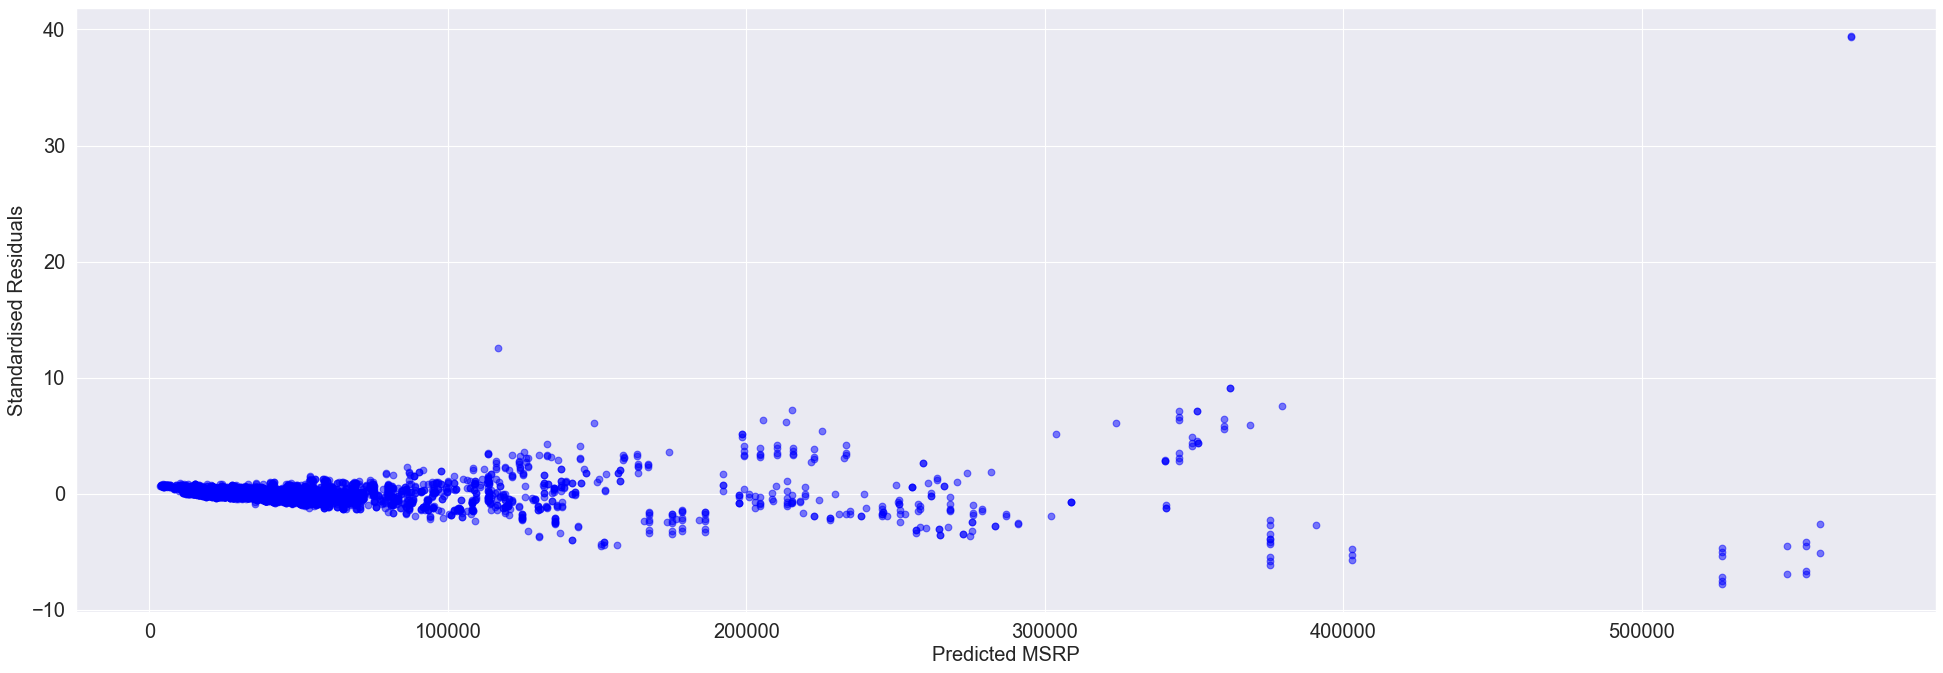

In [39]:
plt.figure(figsize=(30, 10), dpi=80)
plt.scatter(x=df3['yhat'],        
            y=df3['Residuals']/np.std(df3['Residuals']),        
            c='blue', alpha=0.5) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Predicted MSRP', fontsize=18)
plt.ylabel('Standardised Residuals', fontsize=18)
plt.show()

We realised our model's prediction becomes less accurate as predicted MSRP increases as we observe increasing variance of residuals as predicted MSRP increases. Otherwise, at MSRPs < 100,000, the standardised residuals are fairly spread symmetrically and do not deviate too much from 0, where prediction is most accurate.

### Scatterplot of residuals against each X variable

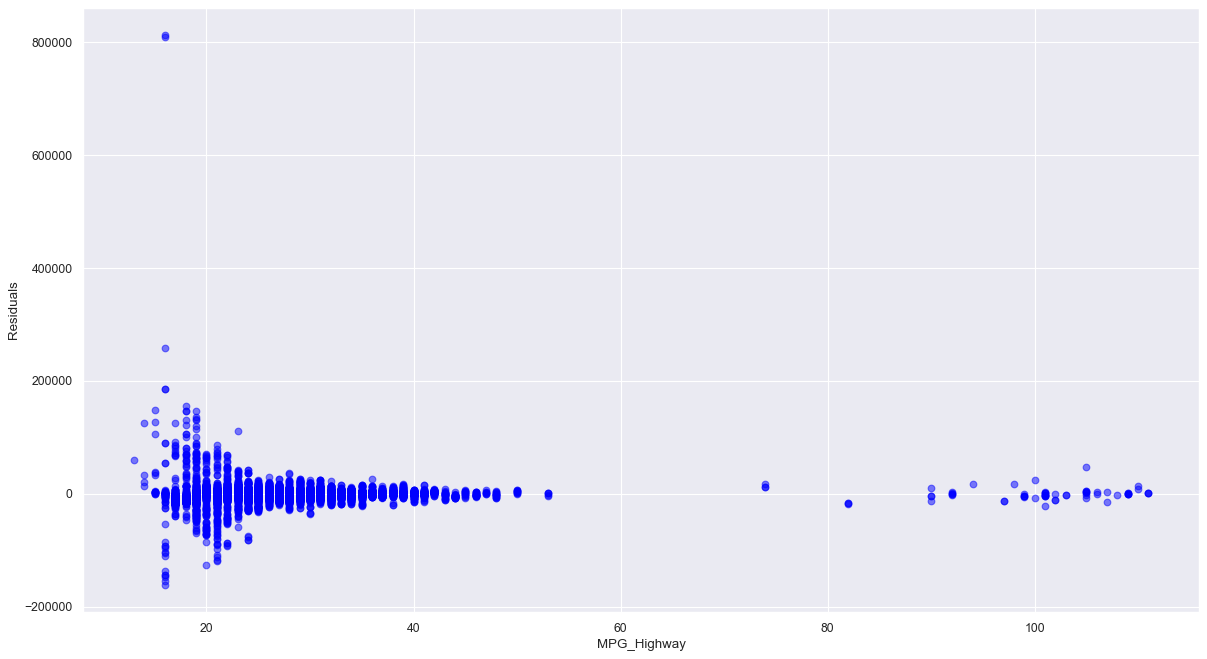

In [31]:
plt.figure(figsize=(18, 10), dpi=80)
plt.scatter(x=mpg_highway,        
            y=df3['Residuals'],        
            c='blue', alpha=0.5)
plt.xlabel('MPG_Highway')
plt.ylabel('Residuals')
plt.show()

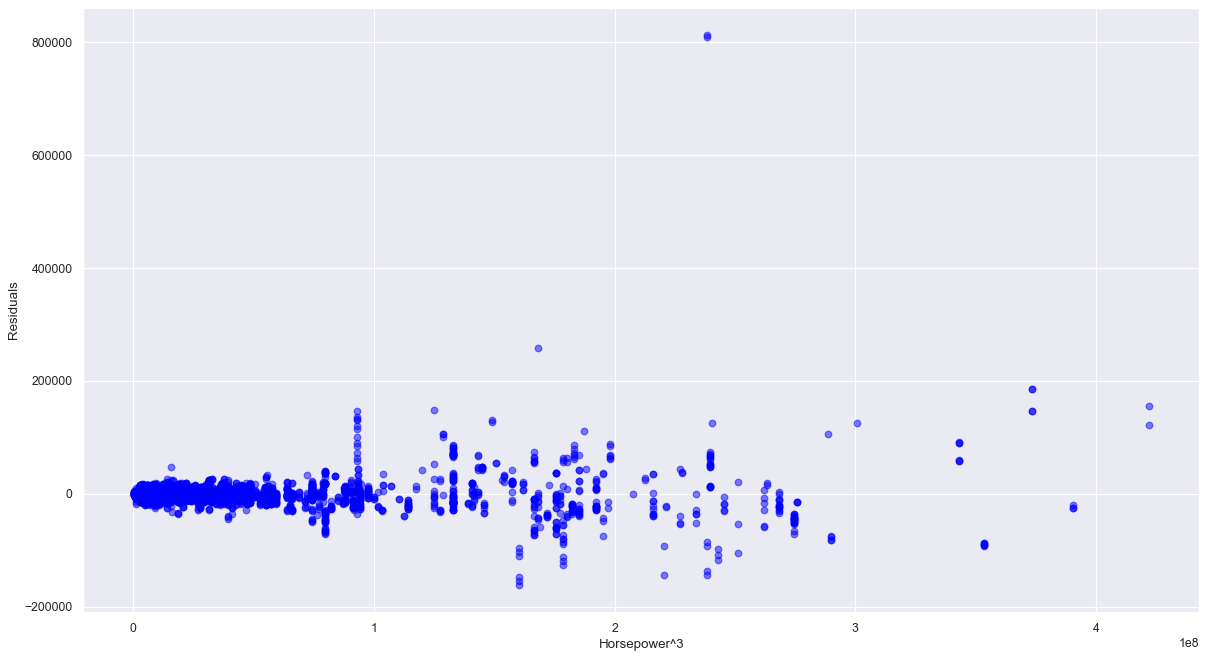

In [33]:
plt.figure(figsize=(18, 10), dpi=80)
plt.scatter(x=HP_cube,        
            y=df3['Residuals'],        
            c='blue', alpha=0.5)
plt.xlabel('Horsepower^3')
plt.ylabel('Residuals')
plt.show()

# Impact of Outlier

In [35]:
df4 = df2.copy()
ind_landaulet = df4.loc[df4['Model']=='Landaulet'].index.values
df4.drop(index = ind_landaulet, inplace = True)
df4.reset_index(inplace = True)

In [36]:
make3= df4['Make']
HP_cube3 = df4['HP^3']
cyl3 = df4['Engine Cylinders']
Trans3  = df4['Transmission Type']
Wheel_Dr3 = df4['Driven_Wheels']
size3 = df4['Vehicle Size']
style3 = df4['Vehicle Style']
mpg_highway3 = df4['highway MPG']
MSRP3 = df4['MSRP']
class_3 = df4['Class']
type_3 = df4['Type']
high_perf3 = df4['High-Performance']
perf3 = df4['Performance']

In [37]:
model_3 = smf.ols('MSRP3 ~ make3 + HP_cube3 + Trans3 + cyl3 + Wheel_Dr3 + size3 + style3 + mpg_highway3 + class_3 + type_3 + high_perf3 + perf3',                                      # Specify the model
               data=df4)                                         # Specify the datasets

results_3 = model_3.fit()                                             # Fit the model
print(results_3.summary())                                          # Show the report of results

                            OLS Regression Results                            
Dep. Variable:                  MSRP3   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     993.6
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:33:22   Log-Likelihood:                -87503.
No. Observations:                7918   AIC:                         1.752e+05
Df Residuals:                    7842   BIC:                         1.757e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

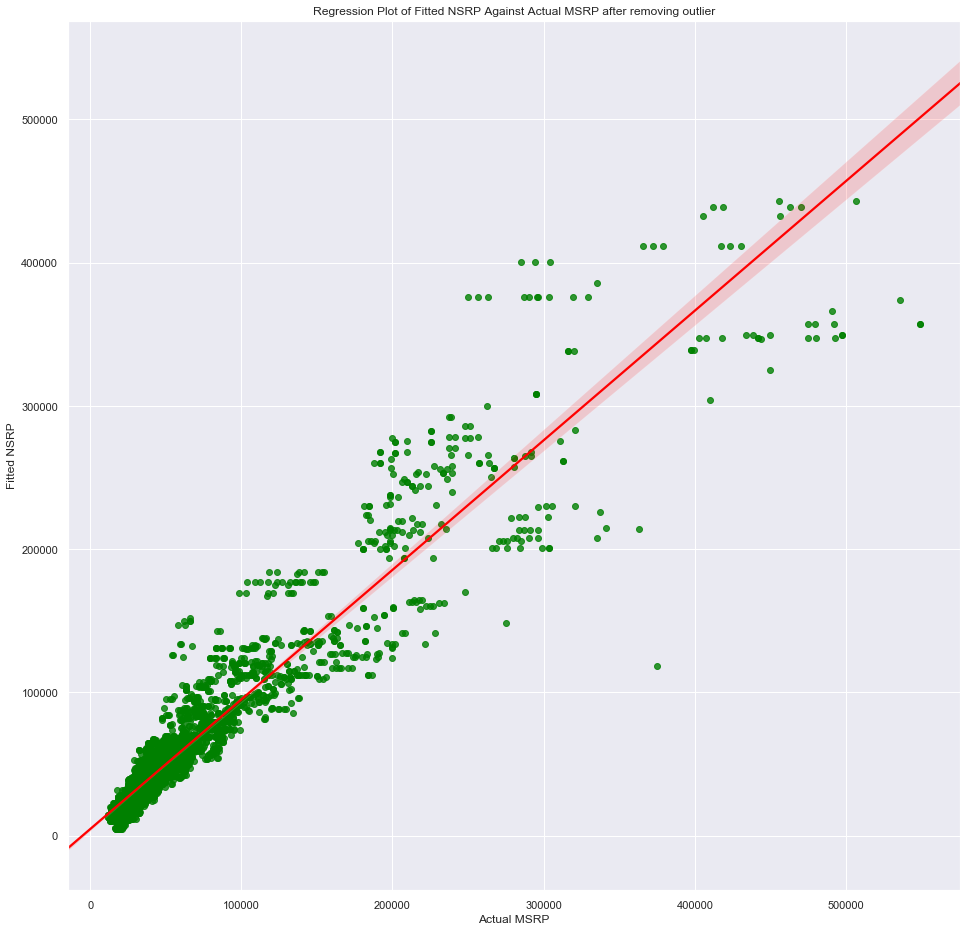

In [38]:
plt.figure(figsize = (16,16))
y_hat_3 = results_3.fittedvalues 
y_act_3 = MSRP3
sns.regplot(x=y_act_3,y=y_hat_3,data=df4, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel('Actual MSRP')
plt.ylabel('Fitted NSRP')
plt.title('Regression Plot of Fitted NSRP Against Actual MSRP after removing outlier')
plt.show()

We identified the outliers to be data points with a larger magnitude in residual, or visually, a longer distance from the data point to the regression line when we plot Fitted MSRP against Actual MSRP. The 2 outlier points identified are Maybach Landaulet. A re-run of the Ordinary Least Squares Multiple Regression showed that original model with the 2 outliers included, caused the regression to skew towards it. There was improvement in adjusted R-squared value from 0.852 to 0.904, and also changes in coeficients of the variables. 